In [29]:
!pip install trax

# Trax

É um **framework** de deep learning de **alto nível** e muito **performático**.

### Linguagem de Alto nível vs Baixo nível

#### Alto Nível
São aquelas cuja sintaxe se aproxima mais da nossa linguagem e se distanciam mais da linguagem de máquina. Portanto no momento da implementação de suas aplicação a maior preocupação fica no **domínio do problema**.

Ex de linguagens: Python e Javascript.

```python
def printa_n_numeros(n):
    for i in range(n):
        print(i)
```

#### Baixo Nível

É aquela que se aproxima mais da linguagem de máquina.

Essas são as que você precisa ter o conhecimento direto da arquitetura do computador para fazer alguma coisa. O lado positivo é que essas linguagens são mais **performaticas**.

Ex de linguagens: C e Assembly


```assembly
  1           0 LOAD_CONST              
              2 LOAD_CONST              
              4 MAKE_FUNCTION          
              6 STORE_NAME         
              8 LOAD_CONST               
             10 RETURN_VALUE

  2           0 SETUP_LOOP             
              2 LOAD_GLOBAL            
              4 LOAD_FAST               
              6 CALL_FUNCTION            
              8 GET_ITER
        >>   10 FOR_ITER                
             12 STORE_FAST              

  3          14 LOAD_GLOBAL              
             16 LOAD_FAST               
             18 CALL_FUNCTION          
             20 POP_TOP
             22 JUMP_ABSOLUTE           
        >>   24 POP_BLOCK
        >>   26 LOAD_CONST              
             28 RETURN_VALUE
```

## O que é um Framework de programação

"É uma linguagem de programção dentro de uma linguagem de programação."

É um template com diversas funções que podem ser usadas pelo desenvolvedor. Com ele, é desnecessário gastar tempo para reproduzir a mesma função em diferentes projetos, auxiliando em um gerenciamento ágil de projetos. Em outras palavras, ele é uma estrutura base.

Ex: React, Tensorflow, Keras e Pytorch.

```python
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))
```

#JAX

Para realizar seus cálculos matemáticos Trax utiliza JAX. Biblioteca altamente performática do Google, e foi baseada no **numpy**.

Features:
- Tensores.
- Gradiente automático.
- Compatibilidade com GPUs e TPUs.

Não tem módulo de números aleatórios.

## Operações básicas

In [31]:
from trax.fastmath import numpy as np
import numpy

In [30]:
matriz = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(matriz)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [32]:
vetor = np.ones(3)

print(vetor)

[1. 1. 1.]


In [33]:
produto = np.dot(vetor, matriz)

print(produto)

[12. 15. 18.]


## Gradiente

A principal vantangem de frameworks de deep learning é o cálculo de gradientes automático

In [12]:
from trax.fastmath import grad

In [37]:
def f(x):
  return 2 *np.tanh( x ** 3)

In [38]:
f(2)

DeviceArray(1.9999995, dtype=float32)

In [39]:
derivada_f = grad(f)

derivada_f(2.0)

DeviceArray(1.1444092e-05, dtype=float32)

In [40]:
def cos(x):
  return np.cos(x)

derivada_cos = grad(cos)

print("Derivada do Cos(x):", derivada_cos(0.0))
print("Sen(x):", np.sin(0.0))
print("Cos(x):", np.cos(0.0))

Derivada do Cos(x): -0.0
Sen(x): 0.0
Cos(x): 1.0


In [41]:
# Parâmetros
epochs = 1000
learning_rate = 0.01

# Inicialização
x = numpy.random.random()

for _ in range(epochs):

  x = x - learning_rate * derivada_cos(x)

print("X do ponto de máximo", x)
print("Ponto de máximo", cos(x))

X do ponto de máximo 3.1410294
Ponto de máximo -0.9999998


In [45]:
# Parâmetros
epochs = 100
learning_rate = 0.1

# Inicialização
x = np.array(numpy.random.randn(5,1))
y = np.array(numpy.random.randn(5,1))

print("Valor da função antes", cos(np.dot(x.T, y)[0, 0]))

for _ in range(epochs):

  x = x + learning_rate * derivada_cos(np.dot(x.T, y)[0, 0])
  y = y + learning_rate * derivada_cos(np.dot(x.T, y)[0, 0])

print("X:")
print(x)

print("Y:")
print(y)
print()

print("Valor da função", cos(np.dot(x.T, y)[0][0]))

Valor da função antes -0.77800775
X:
[[ 0.20201145]
 [-2.074881  ]
 [ 0.6648702 ]
 [ 0.0645073 ]
 [ 1.558202  ]]
Y:
[[0.47301397]
 [1.3067496 ]
 [0.7659807 ]
 [2.7415721 ]
 [1.238393  ]]

Valor da função 1.0


## Adam

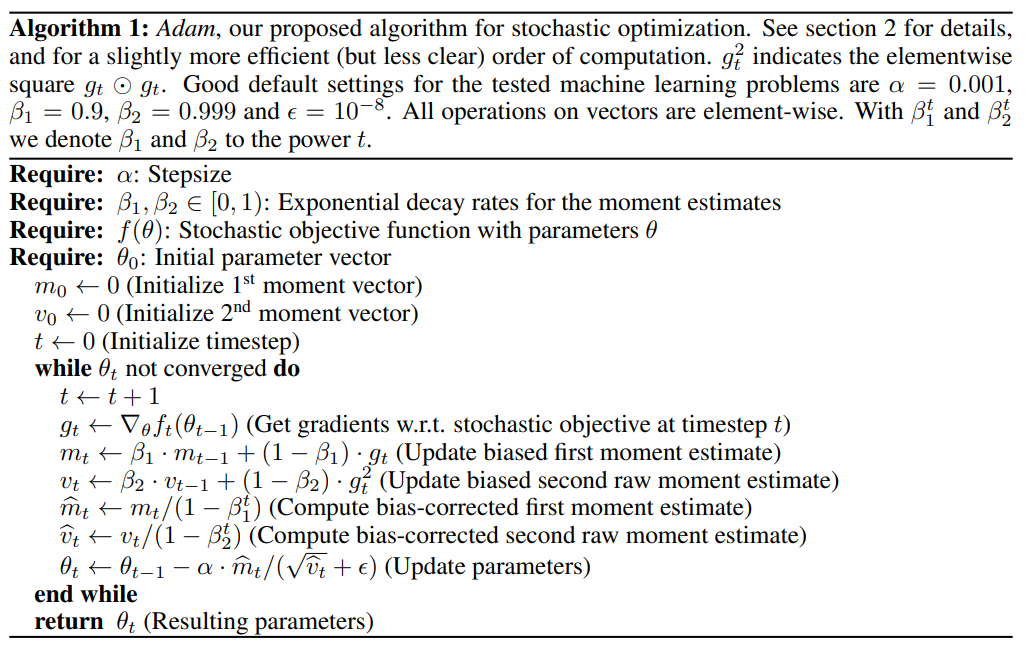

In [26]:
m = 0.0 
v = 0.0
epochs = 100

alpha = 0.1
b1 = 0.9
b2 = 0.999
eps = 1e-5

theta = numpy.random.random()

t = 0
while t < epochs:
  t = t + 1 
  gt = derivada_cos(theta)
  m = b1 * m + (1 - b1) * gt
  v = b2 * v + (1 - b2) * (gt ** 2) 
  mhat = m / (1 - b1 ** (t + 1))
  vhat = v / (1 - b2 ** (t + 1))
  theta = theta - (alpha * mhat / (np.sqrt(vhat) + eps))

print(cos(theta))

-0.9999464
